In [1]:
# """
# main python file to run the power flow of KU distribution system 

# External network: A generator has been modelled as an external network, its control is set to PV

# Nomenclature
# -----------------
# -----------------
# HVB -> High voltage Bus
# LVB1 -> Low voltage Bus number 1
# Line1_2 -> Line connected between LVB01(low voltage bus number 1) and LVB02(bus number 2) 
# Load3 -> Load connected to LVB03(low voltage bus number 03)

# """

In [2]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
import cartopy.crs as ccrs
import math

In [3]:
network = pypsa.Network()

In [4]:
# add high voltage bus
network.add("Bus", "HVB", v_nom = 11.0)

# add low voltage buses
for i in range(1,53):
    network.add("Bus", f"LVB{i}", v_nom = 0.4)

# add an external network to the high voltage bus
network.add("Generator", "External network", bus = "HVB", control = "Slack")

# add a transformer between HVB and LVB1
# network.add("Transformer", "Transformer", bus0 = "HVB", bus1 = "LVB1", model = "t", x = 0.5, r = 0.5,
#         s_nom = 0.25*1.25)
network.add("Transformer", "Transformer", bus0 = "HVB", bus1 = "LVB1", model = "t", x = 0.5, r = 0.5,
           s_nom = 99999999)

# add the lines between the low voltage buses
network.add("Line", "Line1_2", bus0 = "LVB1", bus1 = "LVB2", length = 0.039, r = 0.082*0.039, x = 0.07*0.039)
network.add("Line", "Line2_3", bus0 = "LVB2", bus1 = "LVB3", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line2_4", bus0 = "LVB2", bus1 = "LVB4", length = 0.1485, r = 0.082*0.1485, x = 0.07*0.1485)
network.add("Line", "Line4_5", bus0 = "LVB4", bus1 = "LVB5", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line4_6", bus0 = "LVB4", bus1 = "LVB6", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line4_7", bus0 = "LVB4", bus1 = "LVB7", length = 0.03774, r = 0.082*0.03774, x = 0.07*0.03774)
network.add("Line", "Line7_8", bus0 = "LVB7", bus1 = "LVB8", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line7_9", bus0 = "LVB7", bus1 = "LVB9", length = 0.04611, r = 0.082*0.04611, x = 0.07*0.04611)
network.add("Line", "Line9_10", bus0 = "LVB9", bus1 = "LVB10", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line9_11", bus0 = "LVB9", bus1 = "LVB11", length = 0.03551, r = 0.082*0.03551, x = 0.07*0.03551)
network.add("Line", "Line11_12", bus0 = "LVB11", bus1 = "LVB12", length = 0.01087, r = 0.082*0.01087, x = 0.07*0.01087)
network.add("Line", "Line12_13", bus0 = "LVB12", bus1 = "LVB13", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line12_14", bus0 = "LVB12", bus1 = "LVB14", length = 0.0307, r = 0.082*0.0307, x = 0.07*0.0307)
network.add("Line", "Line14_15", bus0 = "LVB14", bus1 = "LVB15", length = 0.04298, r = 0.082*0.04298, x = 0.07*0.04298)
network.add("Line", "Line15_16", bus0 = "LVB15", bus1 = "LVB16", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line15_17", bus0 = "LVB15", bus1 = "LVB17", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line15_18", bus0 = "LVB15", bus1 = "LVB18", length = 0.09234, r = 0.082*0.09234, x = 0.07*0.09234)
network.add("Line", "Line18_19", bus0 = "LVB18", bus1 = "LVB19", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line14_20", bus0 = "LVB14", bus1 = "LVB20", length = 0.033, r = 0.082*0.033, x = 0.07*0.033)
network.add("Line", "Line20_21", bus0 = "LVB20", bus1 = "LVB21", length = 0.06867, r = 0.082*0.06867, x = 0.07*0.06867)
network.add("Line", "Line21_22", bus0 = "LVB21", bus1 = "LVB22", length = 0.04, r = 0.082*0.04, x = 0.07*0.04)
network.add("Line", "Line21_23", bus0 = "LVB21", bus1 = "LVB23", length = 0.06259, r = 0.082*0.06259, x = 0.07*0.06259)
network.add("Line", "Line1_24", bus0 = "LVB1", bus1 = "LVB24", length = 0.0413, r = 0.082*0.0413, x = 0.07*0.0413)
network.add("Line", "Line24_25", bus0 = "LVB24", bus1 = "LVB25", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line24_26", bus0 = "LVB24", bus1 = "LVB26", length = 0.05058, r = 0.082*0.05058, x = 0.07*0.05058)
network.add("Line", "Line26_27", bus0 = "LVB26", bus1 = "LVB27", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line27_28", bus0 = "LVB27", bus1 = "LVB28", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line26_52", bus0 = "LVB26", bus1 = "LVB52", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line26_29", bus0 = "LVB26", bus1 = "LVB29", length = 0.10924, r = 0.082*0.10924, x = 0.07*0.10924)
network.add("Line", "Line29_30", bus0 = "LVB29", bus1 = "LVB30", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line4_31", bus0 = "LVB4", bus1 = "LVB31", length = 0.04907, r = 0.082*0.04907, x = 0.07*0.04907)
network.add("Line", "Line31_32", bus0 = "LVB31", bus1 = "LVB32", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line31_33", bus0 = "LVB31", bus1 = "LVB33", length = 0.04446, r = 0.082*0.04446, x = 0.07*0.04446)
network.add("Line", "Line33_34", bus0 = "LVB33", bus1 = "LVB34", length = 0.16, r = 0.082*0.16, x = 0.07*0.16)
network.add("Line", "Line33_35", bus0 = "LVB33", bus1 = "LVB35", length = 0.09695, r = 0.082*0.09695, x = 0.07*0.09695)
network.add("Line", "Line35_36", bus0 = "LVB35", bus1 = "LVB36", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line35_37", bus0 = "LVB35", bus1 = "LVB37", length = 0.05521, r = 0.082*0.05521, x = 0.07*0.05521)
network.add("Line", "Line37_38", bus0 = "LVB37", bus1 = "LVB38", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line37_39", bus0 = "LVB37", bus1 = "LVB39", length = 0.141, r = 0.082*0.141, x = 0.07*0.141)
network.add("Line", "Line37_40", bus0 = "LVB37", bus1 = "LVB40", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line40_41", bus0 = "LVB40", bus1 = "LVB41", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line35_42", bus0 = "LVB35", bus1 = "LVB42", length = 0.05915, r = 0.082*0.05915, x = 0.07*0.05915)
network.add("Line", "Line42_43", bus0 = "LVB42", bus1 = "LVB43", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line42_44", bus0 = "LVB42", bus1 = "LVB44", length = 0.05007, r = 0.082*0.05007, x = 0.07*0.05007)
network.add("Line", "Line44_45", bus0 = "LVB44", bus1 = "LVB45", length = 0.05007, r = 0.082*0.05007, x = 0.07*0.05007)
network.add("Line", "Line7_46", bus0 = "LVB7", bus1 = "LVB46", length = 0.01352, r = 0.082*0.01352, x = 0.07*0.01352)
network.add("Line", "Line46_47", bus0 = "LVB46", bus1 = "LVB47", length = 0.04956, r = 0.082*0.04956, x = 0.07*0.04956)
network.add("Line", "Line47_48", bus0 = "LVB47", bus1 = "LVB48", length = 0.05461, r = 0.082*0.05461, x = 0.07*0.05461)
network.add("Line", "Line48_49", bus0 = "LVB48", bus1 = "LVB49", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line48_50", bus0 = "LVB48", bus1 = "LVB50", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line48_51", bus0 = "LVB48", bus1 = "LVB51", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)

# add a load to LVB03 -> Multipurpose Hall
network.add("Load", "Load3", bus = "LVB3", p_set = 0.0621, q_set = 0)

# add loads to LVB5(Block 10) and LVB6(Block 11)
network.add("Load", "Load5", bus = "LVB5", p_set = 0.01242, q_set = 0)
network.add("Load", "Load6", bus = "LVB6", p_set = 0.01242, q_set = 0)

# add a load to LVB8(Administration)
network.add("Load", "Load8", bus = "LVB8", p_set = 0.01242, q_set = 0)

# add a load to LVB10(Library)
network.add("Load", "Load10", bus = "LVB10", p_set = 0.0621, q_set = 0)

# add a load to LVB13(CV Raman Hall)
network.add("Load", "Load13", bus = "LVB13", p_set = 0.09315, q_set = 0)

# add a load to LVB16(Science Block)
network.add("Load", "Load16", bus = "LVB16", p_set = 0.0621, q_set = 0)

# add a load to LVB17(AAC Block)
network.add("Load", "Load17", bus = "LVB17", p_set = 0.03105, q_set = 0)

# add a load to LVB19(Biotechnology Block)
network.add("Load", "Load19", bus = "LVB19", p_set = 0.0621, q_set = 0)

# add a load to LVB22(Girls hostel)
network.add("Load", "Load22", bus = "LVB22", p_set = 0.015525, q_set = 0)

# add a load to LVB23(A5 - Family Quarter)
network.add("Load", "Load23", bus = "LVB23", p_set = 0.01242, q_set = 0)

# add a load to LVB25(Mechanical Block)
network.add("Load", "Load25", bus = "LVB25", p_set = 0.03105, q_set = 0)

# add a load to LVB27(TTC_Block A)
network.add("Load", "Load27", bus = "LVB27", p_set = 0.01242, q_set = 0)

# add a load to LVB28(TTC 2)
network.add("Load", "Load28", bus = "LVB28", p_set = 0.01242, q_set = 0)

# add a load to LVB52(SOM Lab)
network.add("Load", "Load52", bus = "LVB52", p_set = 0.0621, q_set = 0)

# add a load to LVB30(ATM_NIMB)
network.add("Load", "Load30", bus = "LVB30", p_set = 0.0621, q_set = 0)

# add a load to LVB32(Pharmacy Block)
network.add("Load", "Load32", bus = "LVB32", p_set = 0.0621, q_set = 0)

# add a load to LVB36(KU MESH)
network.add("Load", "Load36", bus = "LVB36", p_set = 0.02484, q_set = 0)

# add a load to LVB38(KU Boys Hostel)
network.add("Load", "Load38", bus = "LVB38", p_set = 0.015525, q_set = 0)

# add a load to LVB43(Staff Quarter)
network.add("Load", "Load43", bus = "LVB43", p_set = 0.01242, q_set = 0)

# add a load to LVB45(Nepal invesment Bank)
network.add("Load", "Load45", bus = "LVB45", p_set = 0.03105, q_set = 0)

# add a load to LVB49(Block 8)
network.add("Load", "Load49", bus = "LVB49", p_set = 0.01863, q_set = 0)

# add a load to LVB50(Block 9)
network.add("Load", "Load50", bus = "LVB50", p_set = 0.01242, q_set = 0)

# add a load to LVB51(TTL)
network.add("Load", "Load51", bus = "LVB51", p_set = 0.01242, q_set = 0)

In [5]:
network.consistency_check()

In [6]:
# perform newton Raphson Load Flow
network.pf()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.015628 seconds


{'n_iter': SubNetwork  0
 snapshot     
 now         3,
 'error': SubNetwork             0
 snapshot                
 now         1.193825e-07,
 'converged': SubNetwork     0
 snapshot        
 now         True}

In [7]:
# active power flow through lines
network.lines_t.p0

,Line1_2,Line2_3,Line2_4,Line4_5,Line4_6,Line4_7,Line7_8,Line7_9,Line9_10,Line9_11,...,Line35_42,Line42_43,Line42_44,Line44_45,Line7_46,Line46_47,Line47_48,Line48_49,Line48_50,Line48_51
snapshot,,,,,,,,,,,,,,,,,,,,,
now,0.678107,0.062161,0.606717,0.012423,0.012423,0.405572,0.012423,0.345911,0.06217,0.280462,...,0.043598,0.012423,0.031108,0.031079,0.043615,0.043599,0.043543,0.018636,0.012423,0.012423


In [8]:
# bus voltage magnitudes in per unit
network.buses_t.v_mag_pu

Bus,HVB,LVB1,LVB2,LVB3,LVB4,LVB5,LVB6,LVB7,LVB8,LVB9,...,LVB43,LVB44,LVB45,LVB46,LVB47,LVB48,LVB49,LVB50,LVB51,LVB52
snapshot,,,,,,,,,,,,,,,,,,,,,
now,1.0,1.0,0.985763,0.984793,0.937321,0.937117,0.937117,0.928808,0.928603,0.919899,...,0.925116,0.924459,0.923596,0.928482,0.927288,0.925972,0.925663,0.925766,0.925766,0.991254


In [9]:
network.buses_t.v_mag_pu['LVB12']

snapshot
now    0.912594
Name: LVB12, dtype: float64

In [10]:
# bus voltage phase angles in degree
network.buses_t.v_ang*180/math.pi

Bus,HVB,LVB1,LVB2,LVB3,LVB4,LVB5,LVB6,LVB7,LVB8,LVB9,...,LVB43,LVB44,LVB45,LVB46,LVB47,LVB48,LVB49,LVB50,LVB51,LVB52
snapshot,,,,,,,,,,,,,,,,,,,,,
now,0.0,-2.334777e-07,-0.622034,-0.67014,-2.8993,-2.909934,-2.909934,-3.327807,-3.338636,-3.785656,...,-3.534118,-3.568764,-3.614407,-3.34489,-3.407614,-3.476917,-3.493262,-3.487812,-3.487812,-0.425833


In [11]:
# bus voltage phase angles in radian
network.buses_t.v_ang

Bus,HVB,LVB1,LVB2,LVB3,LVB4,LVB5,LVB6,LVB7,LVB8,LVB9,...,LVB43,LVB44,LVB45,LVB46,LVB47,LVB48,LVB49,LVB50,LVB51,LVB52
snapshot,,,,,,,,,,,,,,,,,,,,,
now,0.0,-4.074954e-09,-0.010857,-0.011696,-0.050602,-0.050788,-0.050788,-0.058081,-0.05827,-0.066072,...,-0.061682,-0.062287,-0.063083,-0.058379,-0.059474,-0.060684,-0.060969,-0.060874,-0.060874,-0.007432


In [12]:
network.graph

<bound method graph of PyPSA Network
Components:
 - Bus: 53
 - Generator: 1
 - Line: 51
 - Load: 24
 - SubNetwork: 1
 - Transformer: 1
Snapshots: 1>

(<matplotlib.collections.PatchCollection at 0x17d5352fe60>,
 <matplotlib.collections.LineCollection at 0x17d53638050>)

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


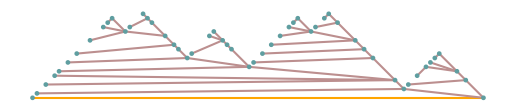

In [13]:
network.plot(bus_sizes = 0.0001)

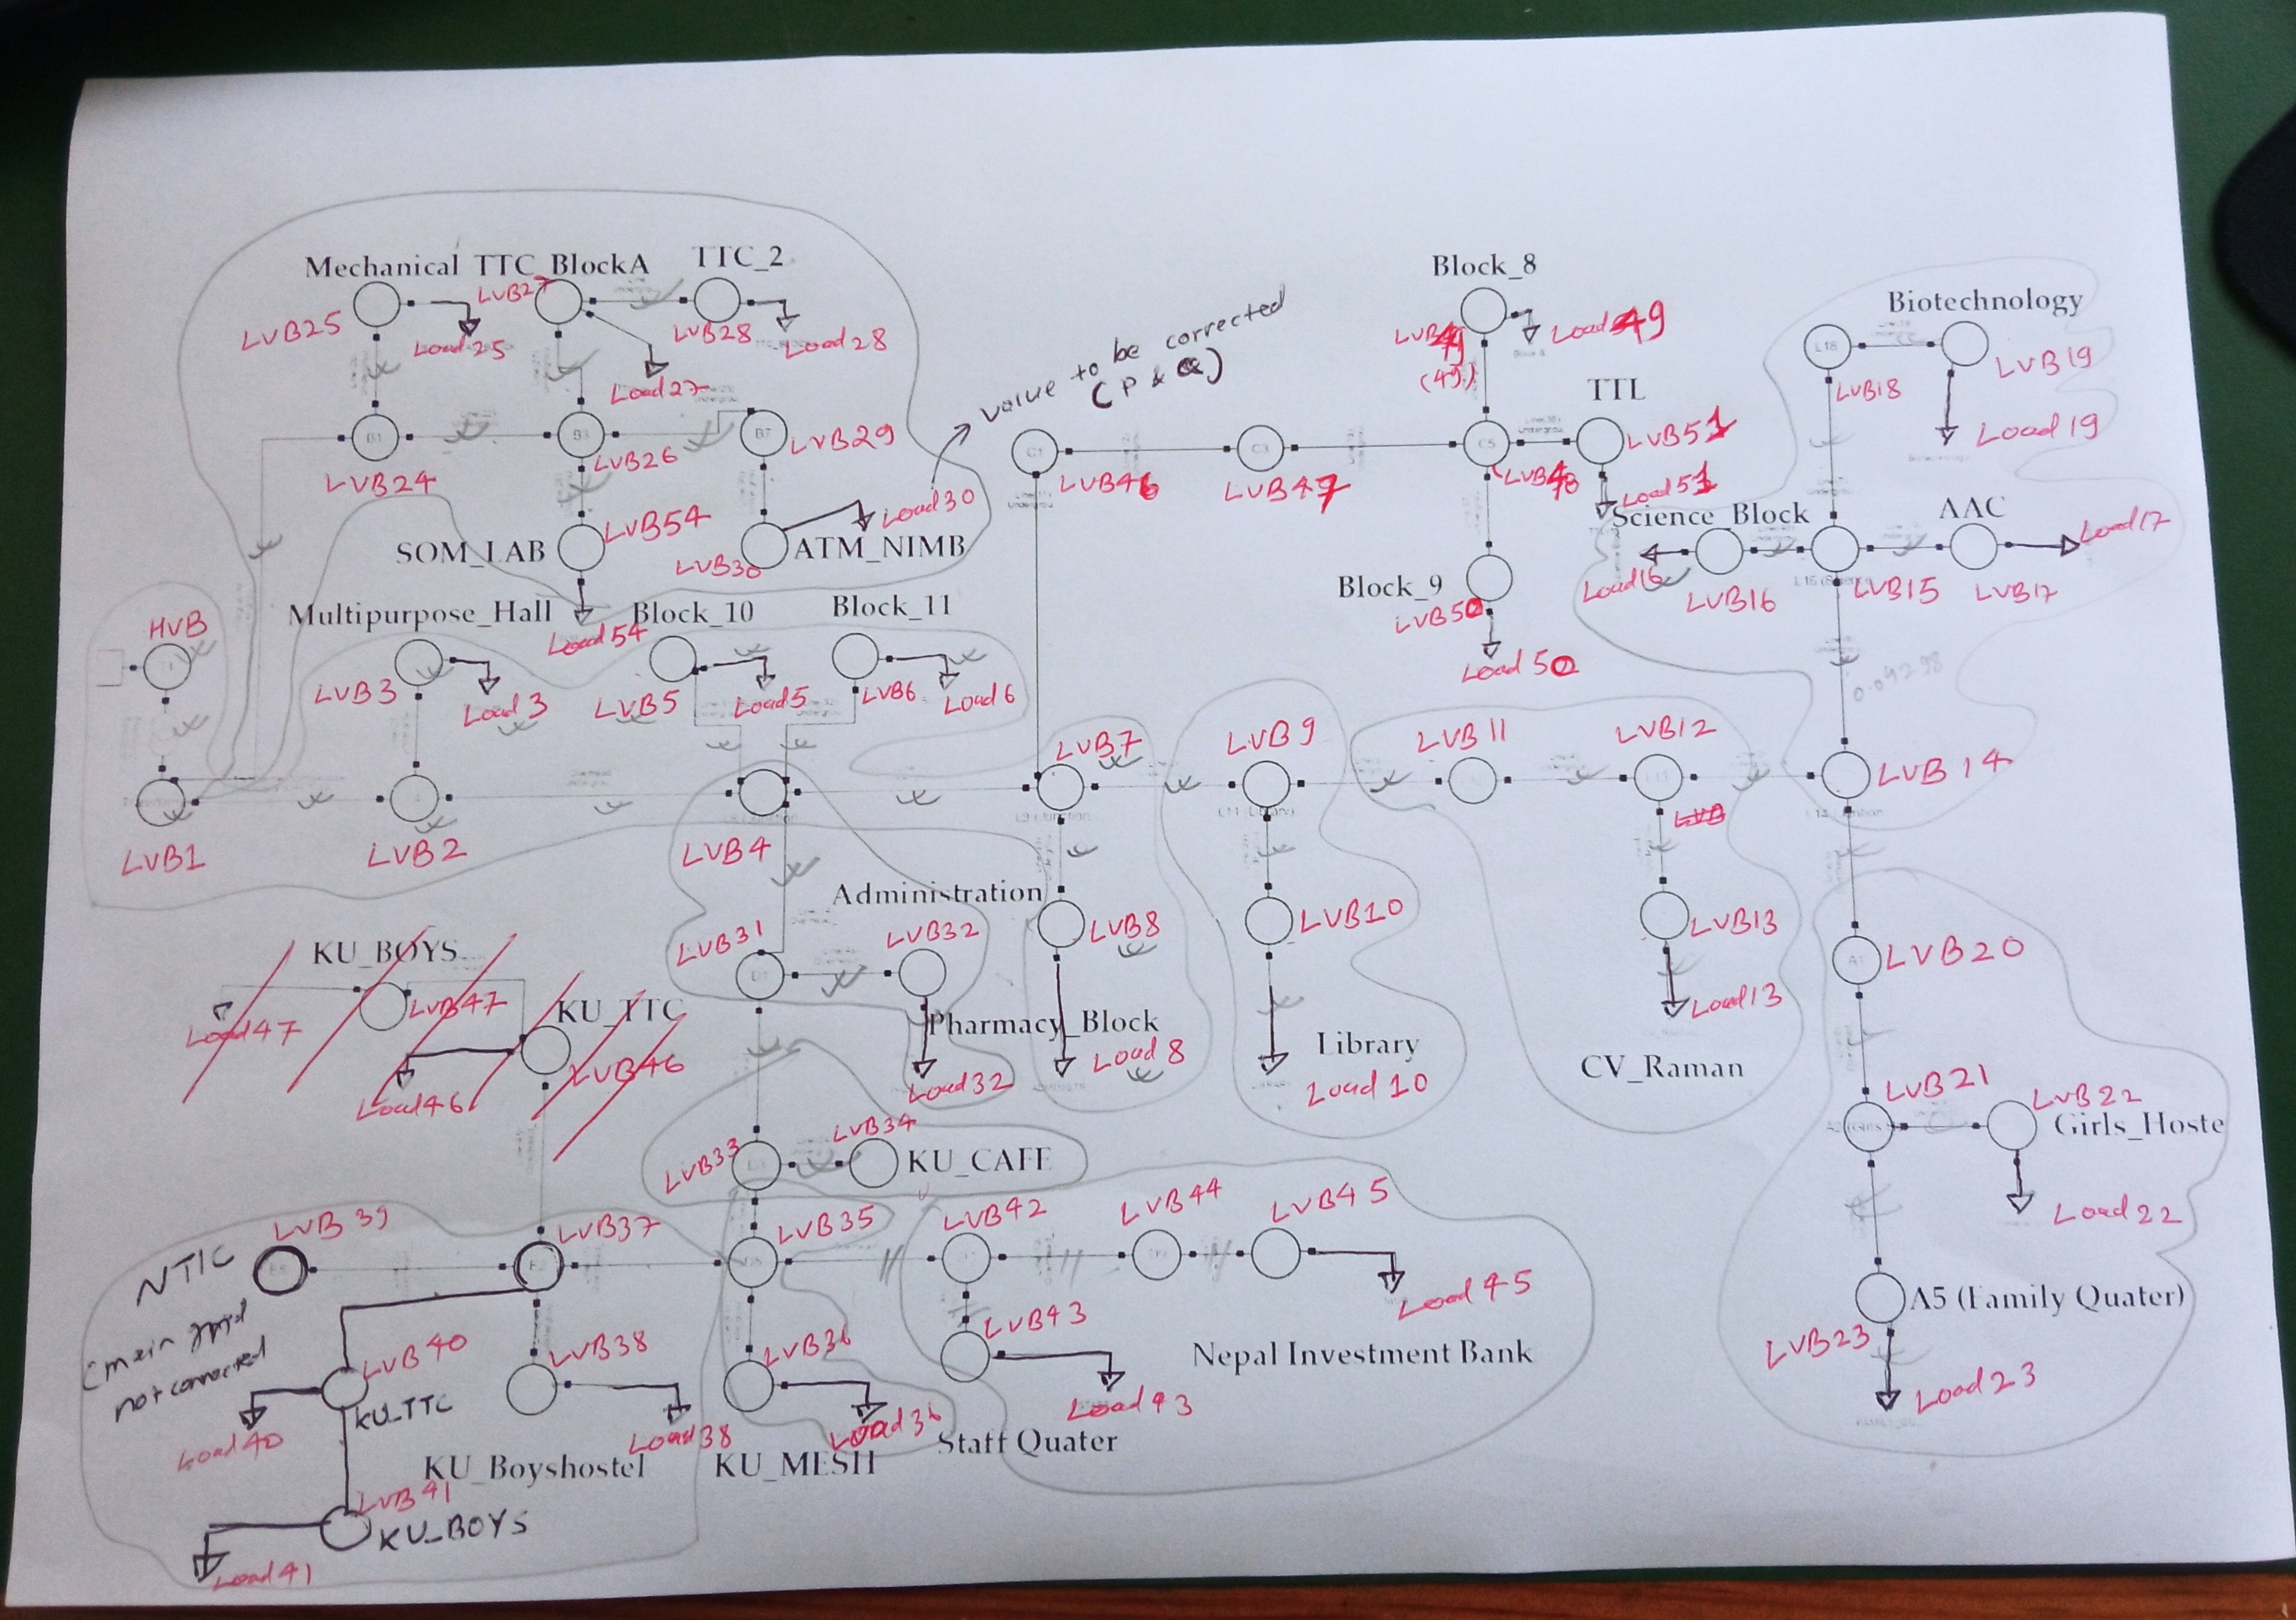